In [3]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#DESCRIPTION

#Background of Problem Statement :

#NYC 311's mission is to provide the public with quick and easy access to all New York City government services 
# and information while offering the best customer service. Each day, NYC311 receives thousands of requests related 
# to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. 
# These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation.
# The agency responds to the request, addresses it, and then closes it.

# Problem Objective :

# Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to 
# understand the pattern in the data and also visualize the major complaint types.
# Domain: Customer Service

#Analysis Tasks to be performed:

#(Perform a service request data analysis of New York City 311 calls) 

# Import a 311 NYC service request.
# Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a 
# new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 
# (Hint: Explore the package/module datetime)
# Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major 
# conclusions that you can come up with after generic data mining.
# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
# Perform a statistical test for the following:
# Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to 
#    accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

# Whether the average response time across complaint types is similar or not (overall)
# Are the type of complaint or service requested and location related?

In [5]:
#importing dataset
data_new = pd.read_csv("D:\\New folder\\311_Service_Requests_from_2010_to_Present.csv",
                       parse_dates=["Created Date", "Closed Date"])

C:\Users\Shree\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#Creating new column namely "Request_Closing_Time" 
data_new["Request_Closing_Time"] = data_new["Closed Date"] - data_new["Created Date"]

In [7]:
data_new

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33


In [8]:
# Checking the first 5 rows of dataset
data_new.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [9]:
#Checking all the columns with null value and data type
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [10]:
# checking total number of null values with respect every column
data_new.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [11]:
#checking all the columns names
data_new.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [12]:
#checking size of rows and columns present in dataset
data_new.shape

(300698, 54)

In [13]:
# dropping the columns 
data_new.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location',
           'Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name',
           'Ferry Direction','Ferry Terminal Name'],axis = 1,inplace=True)

In [14]:
data_new.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [15]:
# dropping the columns 
data_new.drop(['Intersection Street 1','Intersection Street 2','Landmark','School Name','School Number',
           'School Region','School Code','School Phone Number','School Address','School City','School State','School Zip',
           'School Not Found'],axis=1,inplace=True)

In [16]:
data_new.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2164
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Cross Street 1                    49279
Cross Street 2                    49779
Address Type                       2815
City                               2614
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
X Coordinate (State Plane)         3540
Y Coordinate (State Plane)         3540
Park Facility Name                    0


In [17]:
# dropping the rows with having NA values 
data_new=data_new.dropna(axis=0)

In [18]:
data_new

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,...,03 MANHATTAN,MANHATTAN,986640.0,200154.0,Unspecified,MANHATTAN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",0 days 00:38:29
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,09 QUEENS,QUEENS,1026931.0,192185.0,Unspecified,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,03 BROOKLYN,BROOKLYN,999713.0,194161.0,Unspecified,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,10 BRONX,BRONX,1030021.0,244520.0,Unspecified,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33


In [19]:
data_new.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_Closing_Time
count,2.456640e+05,245664.000000,2.456640e+05,245664.000000,245664.000000,245664.000000,245664
mean,3.131080e+07,10878.882665,1.005268e+06,203357.232826,40.724793,-73.924133,0 days 04:21:08.617786895
std,5.783188e+05,537.574694,2.164590e+04,30179.216518,0.082832,0.078067,0 days 05:56:58.670511123
min,3.027948e+07,10000.000000,9.138870e+05,121511.000000,40.499949,-74.253031,0 days 00:01:00
25%,3.080738e+07,10453.000000,9.930450e+05,182375.000000,40.667201,-73.968277,0 days 01:19:00
50%,3.131783e+07,11210.000000,1.003829e+06,200046.000000,40.715704,-73.929275,0 days 02:45:31
75%,3.181589e+07,11238.000000,1.019076e+06,224308.250000,40.782333,-73.874260,0 days 05:24:00
max,3.231064e+07,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760,24 days 01:21:36


In [20]:
# checking different types of complaint types present in dataset 
data_new['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Animal Abuse', 'Vending', 'Noise - Vehicle', 'Drinking',
       'Traffic', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

In [21]:
# groupby using complaint type
Complaint_Type = data_new.groupby(['Complaint Type'])
print(Complaint_Type)

In [22]:
# counting of complaint types
Complaints = data_new['Complaint Type'].value_counts()

In [23]:
Complaints

Blocked Driveway            75291
Illegal Parking             60145
Noise - Street/Sidewalk     38033
Noise - Commercial          32020
Derelict Vehicle            14477
Noise - Vehicle             12122
Animal Abuse                 6573
Vending                      2211
Noise - Park                 1270
Drinking                     1007
Traffic                       918
Noise - House of Worship      696
Posting Advertisement         621
Disorderly Youth              185
Graffiti                       95
Name: Complaint Type, dtype: int64

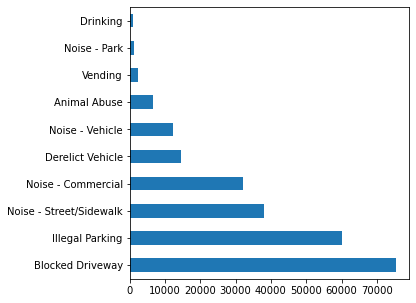

In [24]:
#visualisation of maximum 10 complaints type using bar graph
data_new['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(5,5));


In [25]:
#visualisation of maximum 5 complaints type using pie graph
max_Complaints_head = Complaints[0:5]
max_Complaints_head

Blocked Driveway           75291
Illegal Parking            60145
Noise - Street/Sidewalk    38033
Noise - Commercial         32020
Derelict Vehicle           14477
Name: Complaint Type, dtype: int64

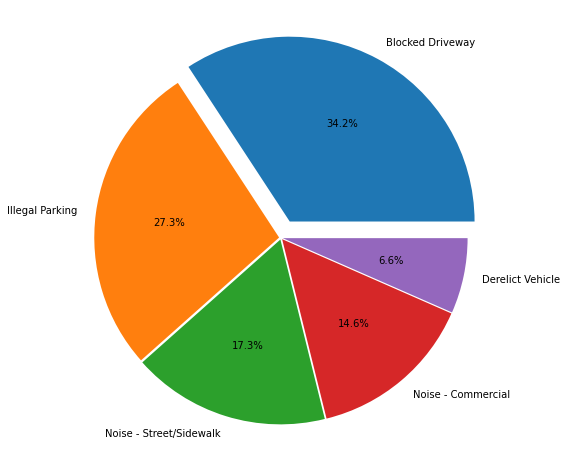

In [26]:
plt.figure(figsize=(8.5,8.5))
explode=[0.1,0.01,0.01,0.01,0.01]
plt.pie(max_Complaints_head,autopct= '%1.1f%%',labels=max_Complaints_head.keys(),explode=explode)
plt.show()

# most of the complaints are blocked Driveway 75291

In [27]:
#groupby using park borough
data_new.groupby('Park Borough')

In [28]:
#counting the values of park borough by value_count function
x = data_new['Park Borough'].value_counts()
x

BROOKLYN         84197
QUEENS           68237
MANHATTAN        48429
BRONX            34518
STATEN ISLAND    10283
Name: Park Borough, dtype: int64

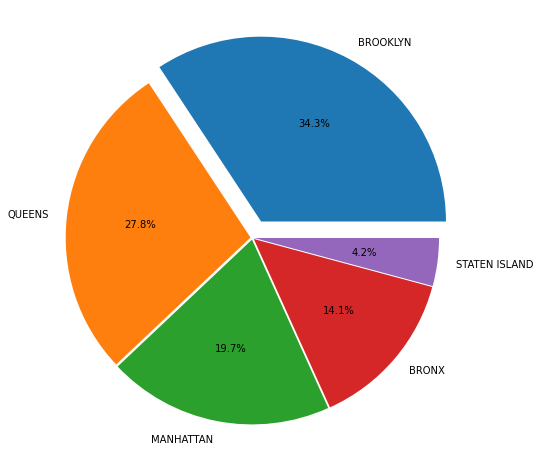

In [29]:
#visualisation of park borough using pie graph
plt.figure(figsize=(8.5,8.5))
explode=[0.1,0.01,0.01,0.01,0.01]
plt.pie(x,autopct="%1.1f%%",labels=x.keys(),explode=explode)
plt.show()

# Complaint type-Blocked driveway analysis by using get_group function

In [31]:

Blocked_Driveway=Complaint_Type.get_group('Blocked Driveway')
Blocked_Driveway.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,03 BRONX,BRONX,1011117.0,244417.0,Unspecified,BRONX,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)",0 days 01:47:55
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,11 BROOKLYN,BROOKLYN,984378.0,166541.0,Unspecified,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:23:02
10,32305071,2015-12-31 23:52:58,2016-01-01 07:41:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11372.0,34-06 73 STREET,...,03 QUEENS,QUEENS,1013795.0,213487.0,Unspecified,QUEENS,40.752600,-73.893363,"(40.752599671969676, -73.8933632141368)",0 days 07:48:02


In [34]:
Blocked_Driveway.sort_values(by='Descriptor',ascending=True)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
259804,30589388,2015-05-10 09:41:00,2015-05-10 09:55:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11365.0,191-00 69 AVENUE,...,08 QUEENS,QUEENS,1045033.0,207520.0,Unspecified,QUEENS,40.736062,-73.780670,"(40.73606224571997, -73.78067015702993)",0 days 00:14:00
141846,31361742,2015-08-21 16:27:49,2015-08-21 17:35:38,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10463.0,3430 CORLEAR AVENUE,...,08 BRONX,BRONX,1010651.0,261079.0,Unspecified,BRONX,40.883236,-73.904524,"(40.88323617937447, -73.90452362130094)",0 days 01:07:49
141847,31364186,2015-08-21 16:26:27,2015-08-21 17:37:44,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11417.0,103-67 103 STREET,...,10 QUEENS,QUEENS,1029120.0,187990.0,Unspecified,QUEENS,40.682552,-73.838221,"(40.68255216346648, -73.83822074600926)",0 days 01:11:17
141848,31364431,2015-08-21 16:24:16,2015-08-22 05:59:47,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11377.0,32-22 56 STREET,...,01 QUEENS,QUEENS,1010525.0,214306.0,Unspecified,QUEENS,40.754858,-73.905162,"(40.754857939284214, -73.90516241691657)",0 days 13:35:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148808,31309880,2015-08-14 23:12:33,2015-08-15 06:04:15,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11375.0,101-20 67 DRIVE,...,06 QUEENS,QUEENS,1025212.0,203533.0,Unspecified,QUEENS,40.725233,-73.852217,"(40.72523293109059, -73.8522165082595)",0 days 06:51:42
148802,31310595,2015-08-14 23:17:00,2015-08-15 00:43:48,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11203.0,746 EAST 48 STREET,...,17 BROOKLYN,BROOKLYN,1003279.0,173618.0,Unspecified,BROOKLYN,40.643197,-73.931431,"(40.643197488291854, -73.93143123970776)",0 days 01:26:48
148771,31308946,2015-08-14 23:33:20,2015-08-15 07:35:29,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,10458.0,288 EAST 201 STREET,...,07 BRONX,BRONX,1016317.0,256846.0,Unspecified,BRONX,40.871599,-73.884053,"(40.87159914464264, -73.88405342556368)",0 days 08:02:09
150312,31307345,2015-08-13 17:39:53,2015-08-13 22:34:27,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11373.0,90-61 55 AVENUE,...,04 QUEENS,QUEENS,1019571.0,207762.0,Unspecified,QUEENS,40.736865,-73.872546,"(40.73686481034968, -73.87254598597772)",0 days 04:54:34


In [37]:
Descriptor_of_Blocked_Driveway=Blocked_Driveway['Descriptor'].value_counts()
Descriptor_of_Blocked_Driveway

No Access         55656
Partial Access    19635
Name: Descriptor, dtype: int64

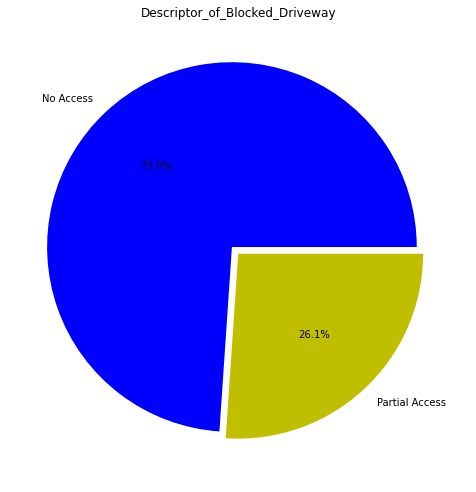

In [38]:
plt.figure(figsize=(8.5,8.5))
explode=[0.05,0.0]
plt.pie(Descriptor_of_Blocked_Driveway,labels=Descriptor_of_Blocked_Driveway.keys(),autopct='%1.1f%%',explode=explode,colors=['b','y'])
plt.title('Descriptor_of_Blocked_Driveway')
plt.show()
#Descriptor_of_Blocked_Driveway.value_counts().plot(kind='barh',figsize=(5,5))

#we can clearly figured out driveway complaint is raised mostly because of no access driveway

# Complaint type-Illegal_park analysis by using get_group function

In [39]:
Illegal_park=Complaint_Type.get_group('Illegal Parking')
Illegal_park.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,07 BROOKLYN,BROOKLYN,986312.0,180032.0,Unspecified,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:53:30
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,12 MANHATTAN,MANHATTAN,1001578.0,245627.0,Unspecified,MANHATTAN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",0 days 01:57:28
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,09 QUEENS,QUEENS,1030662.0,196163.0,Unspecified,QUEENS,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)",0 days 08:33:02


In [40]:
Illegal_park.sort_values(by='Descriptor',ascending=True)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
300671,30283901,2015-03-29 00:58:08,2015-03-29 04:44:02,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10019.0,446 WEST 49 STREET,...,04 MANHATTAN,MANHATTAN,986808.0,217413.0,Unspecified,MANHATTAN,40.763425,-73.990766,"(40.76342452850363, -73.99076591082245)",0 days 03:45:54
68166,31838887,2015-10-25 08:26:15,2015-10-25 11:19:22,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11378.0,59-52 57 ROAD,...,05 QUEENS,QUEENS,1009830.0,202504.0,Unspecified,QUEENS,40.722466,-73.907716,"(40.7224664314795, -73.90771584149158)",0 days 02:53:07
68163,31819100,2015-10-25 08:31:35,2015-10-26 02:57:05,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10462.0,1497 ZEREGA AVENUE,...,10 BRONX,BRONX,1026202.0,244599.0,Unspecified,BRONX,40.837943,-73.848388,"(40.8379433849966, -73.84838834417445)",0 days 18:25:30
212141,30893255,2015-06-20 12:10:47,2015-06-20 16:27:17,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11234.0,1254 EAST 68 STREET,...,18 BROOKLYN,BROOKLYN,1007565.0,166545.0,Unspecified,BROOKLYN,40.623773,-73.916012,"(40.623773366718254, -73.91601158882064)",0 days 04:16:30
212145,30897722,2015-06-20 12:04:24,2015-06-20 15:24:09,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11219.0,1248 64 STREET,...,10 BROOKLYN,BROOKLYN,983690.0,167802.0,Unspecified,BROOKLYN,40.627254,-74.002017,"(40.62725422952726, -74.00201741179838)",0 days 03:19:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140540,31367938,2015-08-22 16:14:51,2015-08-23 21:17:09,NYPD,New York City Police Department,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,11435.0,84-06 143 STREET,...,08 QUEENS,QUEENS,1035940.0,198257.0,Unspecified,QUEENS,40.710695,-73.813552,"(40.71069542826212, -73.81355244317614)",1 days 05:02:18
153091,31280043,2015-08-10 20:01:00,2015-08-10 23:05:00,NYPD,New York City Police Department,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,10002.0,2 PIKE STREET,...,03 MANHATTAN,MANHATTAN,986241.0,199510.0,Unspecified,MANHATTAN,40.714285,-73.992818,"(40.7142853806812, -73.9928180150992)",0 days 03:04:00
128269,31450310,2015-09-02 02:37:00,2015-09-02 03:51:00,NYPD,New York City Police Department,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,10002.0,2 PIKE STREET,...,03 MANHATTAN,MANHATTAN,986241.0,199510.0,Unspecified,MANHATTAN,40.714285,-73.992818,"(40.7142853806812, -73.9928180150992)",0 days 01:14:00
272554,30509233,2015-04-29 09:25:16,2015-04-29 12:45:47,NYPD,New York City Police Department,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,10002.0,28 ALLEN STREET,...,03 MANHATTAN,MANHATTAN,986425.0,200027.0,Unspecified,MANHATTAN,40.715704,-73.992154,"(40.715704378768386, -73.99215411867152)",0 days 03:20:31


In [42]:
#illegal parking description by using value count of descriptor
Descriptor_of_illegal_park=Illegal_park['Descriptor'].value_counts()
Descriptor_of_illegal_park

Posted Parking Sign Violation     17231
Blocked Hydrant                   14505
Commercial Overnight Parking       9541
Blocked Sidewalk                   9132
Double Parked Blocking Traffic     4182
Double Parked Blocking Vehicle     2973
Overnight Commercial Storage       1257
Unauthorized Bus Layover           1010
Detached Trailer                    314
Name: Descriptor, dtype: int64

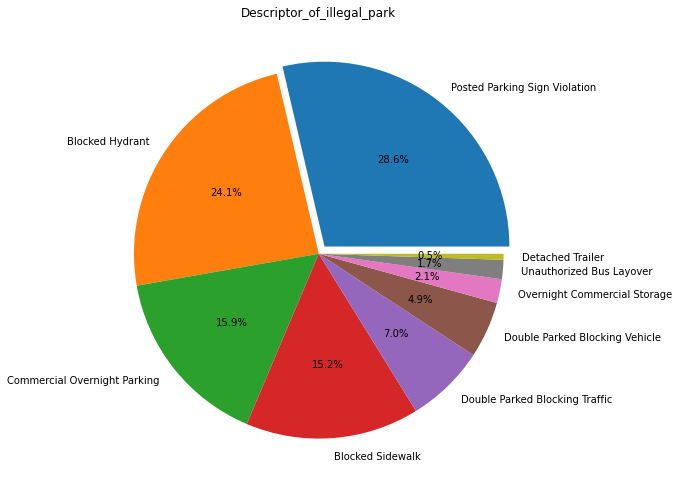

In [43]:
plt.figure(figsize=(8.5,8.5))
explode=[0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
plt.pie(Descriptor_of_illegal_park,labels=Descriptor_of_illegal_park.keys(),autopct='%1.1f%%',explode=explode)
plt.title('Descriptor_of_illegal_park')
plt.show()

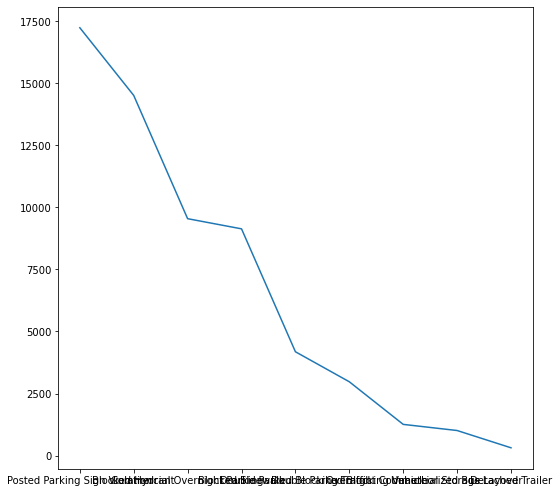

In [138]:
plt.figure(figsize=(8.5,8.5))
plt.plot(Descriptor_of_illegal_park)

In [44]:
#checking complaints status open and closed
data_new['Status'].value_counts()

Closed    245664
Name: Status, dtype: int64

Number of closed complaints are 245664

In [63]:
City_wise = data_new.groupby(["Complaint Type",'City'])
City_wise

In [46]:
data_new.groupby(['Complaint Type',"Request_Closing_Time"]).max()

Unique Key        Created Date  \
Complaint Type Request_Closing_Time                                   
Animal Abuse   0 days 00:03:53         31829423 2015-10-26 23:12:37   
               0 days 00:03:54         31149631 2015-07-23 21:09:47   
               0 days 00:04:06         30967963 2015-06-29 19:39:27   
               0 days 00:04:46         30963505 2015-06-29 19:45:02   
               0 days 00:05:25         31068246 2015-07-13 22:05:59   
...                                         ...                 ...   
Vending        1 days 11:56:00         31928511 2015-11-06 19:02:00   
               1 days 13:08:16         31551806 2015-09-16 10:40:52   
               1 days 13:27:53         31962602 2015-11-11 18:52:00   
               2 days 04:01:28         31767001 2015-10-16 15:32:45   
               2 days 16:22:36         32014237 2015-11-18 15:58:13   

                                            Closed Date Agency  \
Complaint Type Request_Closing_Time                              
Animal Abuse   0 days 00:03:53      2015-10-26 23:16:30   NYPD   
               0 days 00:03:54      2015-07-23 21:13:41   NYPD   
               0 days 00:04:06      2015-06-29 19:43:33   NYPD   
               0 days 00:04:46      2015-06-29 19:49:48   NYPD   
               0 days 00:05:25      2015-07-13 22:11:24   NYPD   
...                                                 ...    ...   
Vending        1 days 11:56:00      2015-11-08 06:58:00   NYPD   
               1 days 13:08:16      2015-09-17 23:49:08   NYPD   
               1 days 13:27:53      2015-11-13 08:19:53   NYPD   
               2 days 04:01:28      2015-10-18 19:34:13   NYPD   
               2 days 16:22:36      2015-11-21 08:20:49   NYPD   

                                                         Agency Name  \
Complaint Type Request_Closing_Time                                    
Animal Abuse   0 days 00:03:53       New York City Police Department   
               0 days 00:03:54       New York City Police Department   
               0 days 00:04:06       New York City Police Department   
               0 days 00:04:46       New York City Police Department   
               0 days 00:05:25       New York City Police Department   
...                                                              ...   
Vending        1 days 11:56:00       New York City Police Department   
               1 days 13:08:16       New York City Police Department   
               1 days 13:27:53       New York City Police Department   
               2 days 04:01:28       New York City Police Department   
               2 days 16:22:36       New York City Police Department   

                                                    Descriptor  \
Complaint Type Request_Closing_Time                              
Animal Abuse   0 days 00:03:53                       Neglected   
               0 days 00:03:54                       Neglected   
               0 days 00:04:06       Other (complaint details)   
               0 days 00:04:46                      No Shelter   
               0 days 00:05:25                       Neglected   
...                                                        ...   
Vending        1 days 11:56:00              In Prohibited Area   
               1 days 13:08:16                      Unlicensed   
               1 days 13:27:53                      Unlicensed   
               2 days 04:01:28                      Unlicensed   
               2 days 16:22:36                      Unlicensed   

                                                  Location Type  Incident Zip  \
Complaint Type Request_Closing_Time                                             
Animal Abuse   0 days 00:03:53       Residential Building/House       10025.0   
               0 days 00:03:54       Residential Building/House       11209.0   
               0 days 00:04:06       Residential Building/House       10032.0   
               0 days 00:04:46             Residentia

In [61]:
descriptor_data= data_new.groupby('Descriptor').size()
plot(descriptor_data)

Descriptor
After Hours - Licensed Est           68
Banging/Pounding                   3788
Blocked Hydrant                   14505
Blocked Sidewalk                   9132
Building                             58
Car/Truck Horn                     2323
Car/Truck Music                    8442
Chained                             424
Chronic Speeding                    102
Chronic Stoplight Violation          24
Commercial Overnight Parking       9541
Congestion/Gridlock                 521
Detached Trailer                    314
Double Parked Blocking Traffic     4182
Double Parked Blocking Vehicle     2973
Drag Racing                          72
Engine Idling                      3001
In Car                              150
In Prohibited Area                 1298
In Public                           707
Loud Music/Party                  48829
Loud Talking                      17671
Loud Television                      87
Neglected                          3339
No Access                    

In [59]:
# maximum time required to close the complaints
max_close_time=Complaint_Type['Request_Closing_Time'].max()
max_close_time

Complaint Type
Animal Abuse               21 days 15:16:01
Blocked Driveway            6 days 04:17:00
Derelict Vehicle            9 days 07:21:06
Disorderly Youth            1 days 04:03:27
Drinking                    3 days 22:46:00
Graffiti                    1 days 02:34:06
Illegal Parking            24 days 01:21:36
Noise - Commercial          5 days 06:24:00
Noise - House of Worship    2 days 01:06:00
Noise - Park                2 days 09:41:00
Noise - Street/Sidewalk     6 days 03:23:00
Noise - Vehicle             6 days 03:27:00
Posting Advertisement       0 days 15:34:00
Traffic                     1 days 15:26:00
Vending                     2 days 16:22:36
Name: Request_Closing_Time, dtype: timedelta64[ns]

# maximum time of 24 days 01:21:36 required to close the complaint for Illegal Parking.            

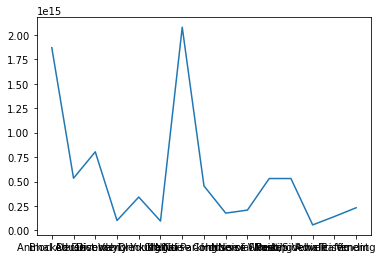

In [60]:
plt.plot(max_close_time)